In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("data\Spotify Million Song Dataset_exported.csv")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ASHISH RAJ\AppData\Local\Temp\ipykernel_10668\3155910800.py:1: SyntaxWarning: invalid escape sequence '\S'
  df=pd.read_csv("data\Spotify Million Song Dataset_exported.csv")


In [3]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [5]:
df = df[['artist', 'song', 'text']]

In [6]:
df.head()

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante","Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


In [7]:
df['text'][0]

"Look at her face, it's a wonderful face  \nAnd it means something special to me  \nLook at the way that she smiles when she sees me  \nHow lucky can one fellow be?  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?  \n  \nAnd when we go for a walk in the park  \nAnd she holds me and squeezes my hand  \nWe'll go on walking for hours and talking  \nAbout all the things that we plan  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?\n\n"

In [8]:
df.isna().sum()

artist    0
song      0
text      0
dtype: int64

In [9]:
df=df[df['text'].str.len()>30]

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
print("Total songs after cleaning:", len(df))
df.head()

Total songs after cleaning: 57650


,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante","Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


In [ ]:
#Text Preprocessing

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ASHISH
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))

stop_words

In [16]:
# lowercase
def preprocess(text):
    text=text.lower()
    
    return text

In [17]:
preprocess("HI HOW ARE YOU")

'hi how are you'

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocess(text):
    text=text.lower()   # lowercase
    
    #remove punctuation
    text = text.translate(str.maketrans('','',string.punctuation))
    
    return text

In [21]:
preprocess("HI HOW ARE YOU!!!!!!!@[]//")

'hi how are you'

In [22]:
def preprocess(text):
    text=text.lower()   # lowercase
    
    #remove punctuation
    text = text.translate(str.maketrans('','',string.punctuation))
    
    #tokenize
    words= text.split()
    
    return text

In [25]:
preprocess("HI HOW ARE YOU!!!!!!!@[]//")

'hi how are you'

In [30]:
def preprocess(text):
    text=text.lower()   # lowercase
    
    #remove punctuation
    text = text.translate(str.maketrans('','',string.punctuation))
    
    #tokenize
    text= text.split()
    
    # remove stopwords
    text =[word for word in text if word not in stop_words]
    
    return text
    # return words

In [31]:
preprocess("a the and HI HOW ARE YOU!!!!!!!@[]//")

['hi']

In [ ]:
def preprocess(text):
    text = text.lower()
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # tokenize
    words = text.split()
    
    # remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # join back to string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [33]:
preprocess("a the and HI ashish raj HOW ARE YOU!!!!!!!@[]//")

'hi ashish raj'

In [37]:
df['clean_text'] = df['text'].apply(preprocess)

df[['text', 'clean_text']].head()

,text,clean_text
0,"Look at her face, it's a wonderful face \nAnd...",look face wonderful face means something speci...
1,"Take it easy with me, please \nTouch me gentl...",take easy please touch gently like summer even...
2,I'll never know why I had to go \nWhy I had t...,ill never know go put lousy rotten show boy to...
3,Making somebody happy is a question of give an...,making somebody happy question give take learn...
4,Making somebody happy is a question of give an...,making somebody happy question give take learn...


In [40]:
df['text'][0]

"Look at her face, it's a wonderful face  \nAnd it means something special to me  \nLook at the way that she smiles when she sees me  \nHow lucky can one fellow be?  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?  \n  \nAnd when we go for a walk in the park  \nAnd she holds me and squeezes my hand  \nWe'll go on walking for hours and talking  \nAbout all the things that we plan  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?\n\n"

In [41]:
df['clean_text'][0]

'look face wonderful face means something special look way smiles sees lucky one fellow shes kind girl makes feel fine could ever believe could mine shes kind girl without im blue ever leaves could could go walk park holds squeezes hand well go walking hours talking things plan shes kind girl makes feel fine could ever believe could mine shes kind girl without im blue ever leaves could could'

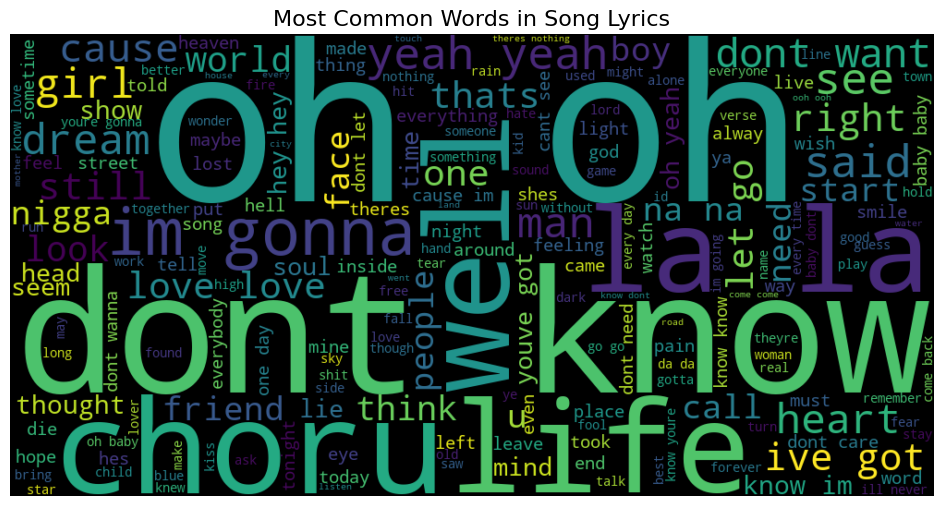

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned lyrics into one text
all_lyrics = " ".join(df['clean_text'])

# Create word cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    max_words=200
).generate(all_lyrics)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Song Lyrics", fontsize=16)
plt.show()


TF-IDF Vectorization + Cosine Similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(
    max_features=5000,  # avoid noise and memory issue
    ngram_range=(1,2)   # capture phrase like "dancing queen"
)
tfidf_matrix= tfidf.fit_transform(df['clean_text'])

print('tfidf matrix shape',tfidf_matrix.shape)

tfidf matrix shape (57650, 5000)


(rows = number of songs, columns = vocabulary size)


In [44]:
from sklearn.metrics.pairwise import cosine_similarity
# calculating similarity beetween all song is too heavy so we will
# calcuate only when user input 

In [45]:
def predic_song(input_lyrics,top_n=1):
    
    cleaned_input=preprocess(input_lyrics)   # text preprocessing
    
    input_vector= tfidf.transform([cleaned_input])  # convert input into vector
    
    simlarity_score=cosine_similarity(input_vector,tfidf_matrix)[0]  # compute similarity
    
    top_match= simlarity_score.argsort()[-top_n:][::-1]
    
    result=[]
    for idx in top_match:
        result.append({
            "artist":df.iloc[idx]['artist'],
            "song":df.iloc[idx]['song'],
            "similarity score":simlarity_score[idx]
        })
        
    return result

In [48]:
# test_lyrics = "look at her face its a wonderful face"
test_lyrics = """
look at her face its a wonderful face
and it means something special to me
she's just my kind of girl she makes me feel fine
"""

prediction = predic_song(test_lyrics,top_n=3)

prediction


[{'artist': 'ABBA',
  'song': "Ahe's My Kind Of Girl",
  'similarity score': np.float64(0.5846407784959438)},
 {'artist': 'The Beatles',
  'song': 'I Feel Fine',
  'similarity score': np.float64(0.341575945174914)},
 {'artist': 'Nirvana',
  'song': 'I Feel Fine',
  'similarity score': np.float64(0.33762751489575404)}]

In [50]:
import random

def evaluate_model(df, sample_size=100, top_k=3):
    correct = 0

    # randomly sample songs
    sampled_rows = df.sample(n=sample_size, random_state=42)

    for _, row in sampled_rows.iterrows():
        true_song = row['song']
        
        # take a snippet of lyrics as input
        lyric_snippet = row['text'][:200]
        
        predictions = predic_song(lyric_snippet, top_n=top_k)
        predicted_songs = [pred['song'] for pred in predictions]
        
        if true_song in predicted_songs:
            correct += 1

    accuracy = correct / sample_size
    return accuracy


In [51]:
top1_acc = evaluate_model(df, sample_size=100, top_k=1)
top3_acc = evaluate_model(df, sample_size=100, top_k=3)
top5_acc = evaluate_model(df, sample_size=100, top_k=5)

print(f"Top-1 Accuracy: {top1_acc:.2f}")
print(f"Top-3 Accuracy: {top3_acc:.2f}")
print(f"Top-5 Accuracy: {top5_acc:.2f}")


Top-1 Accuracy: 0.73
Top-3 Accuracy: 0.79
Top-5 Accuracy: 0.82
